In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('~/data/trip.csv')

In [4]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22696    False
22697    False
22698    False
22699    False
22700    False
Length: 22701, dtype: bool

In [8]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [9]:
data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [10]:
data=data.drop_duplicates()

In [11]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [12]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [13]:
# Q. 전체 데이터 대비 결측치의 비율을 확인합니다.

data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [14]:
# Q. 결측치를 제거합니다.

data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [15]:
data = data.dropna()

In [16]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

In [17]:
# passenger_count 컬럼의 값을 기준으로 정렬합니다.

data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

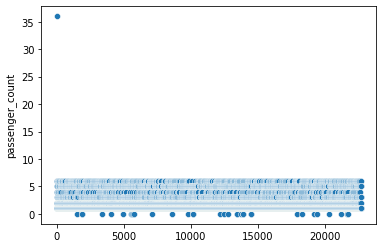

In [18]:
# passenger_count 값의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

In [19]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)

data = data[data['passenger_count'] <= 6]

In [20]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)

len(data[data['passenger_count'] == 0])

33

In [21]:
# passenger_count 컬럼의 이상치를 제거합니다.

data = data[data['passenger_count'] != 0]

<AxesSubplot:ylabel='passenger_count'>

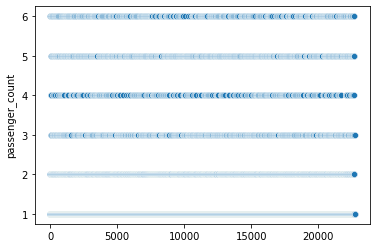

In [22]:
# passenger_count의 scatter plot을 다시 그려봅니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

In [23]:
# Q. trip_distance의 이상치를 확인합니다.
data['trip_distance'].sort_values()

3764      0.00
13064     0.00
5620      0.00
1277      0.00
5632      0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22662, dtype: float64

<AxesSubplot:ylabel='trip_distance'>

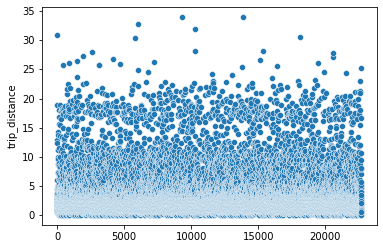

In [24]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

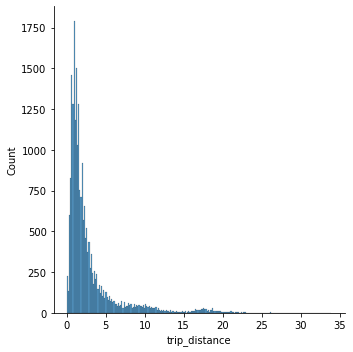

In [27]:
sns.displot(data['trip_distance'])

In [28]:
# Q. trip_distance의 이상치를 제거합니다.

data = data[data['trip_distance'] <= 25]
data = data[data['trip_distance']!=0]
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

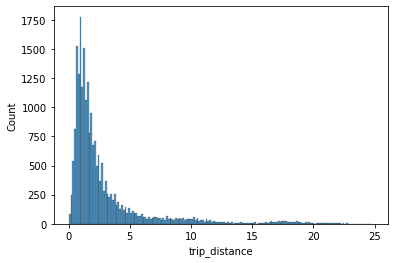

In [29]:
# Q. trip_distance의 히스토그램을 그립니다.

sns.histplot(data['trip_distance'])

In [30]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000
mean,1.646049,2.902920,12.877300,1.817237,0.304598
std,1.285861,3.557307,12.425328,2.703847,1.371151
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.080000,14.500000,2.450000,0.000000
max,6.000000,24.890000,999.990000,200.000000,19.100000


In [32]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)

(data['fare_amount'] <= 0).sum()

16

In [33]:
# Q. fare_amount의 이상치를 제거합니다.

data=data[data['fare_amount'] > 0]

In [34]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.0,10.50
13496,Amber Boyd,01/15/2017 5:04:18 AM,01/15/2017 5:04:21 AM,Cash,1,0.02,2.50,0.0,0.00
12336,Melissa Marshall,10/17/2017 6:01:43 PM,10/17/2017 6:02:14 PM,Cash,2,0.04,2.50,0.0,0.00
17749,Tina Castro,06/13/2017 2:45:20 PM,06/13/2017 2:46:07 PM,Cash,1,0.10,2.50,0.0,0.00
2225,Travis Dyer,12/17/2017 8:35:28 PM,12/17/2017 8:35:31 PM,Cash,1,10.00,2.50,0.0,0.00
...,...,...,...,...,...,...,...,...,...
6710,Nicholas Charles,10/30/2017 11:23:46 AM,10/30/2017 11:23:49 AM,Credit Card,1,0.32,100.00,25.2,0.00
13623,Erica Byrd,11/04/2017 1:32:14 PM,11/04/2017 2:18:50 PM,Debit Card,2,19.80,105.00,8.0,2.64
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.0,12.50
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.0,0.00


<AxesSubplot:ylabel='fare_amount'>

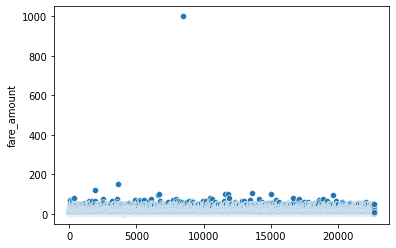

In [35]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [36]:
# Q. fare_amount의 이상치를 제거합니다.

data=data[data['fare_amount']<200]

<AxesSubplot:ylabel='fare_amount'>

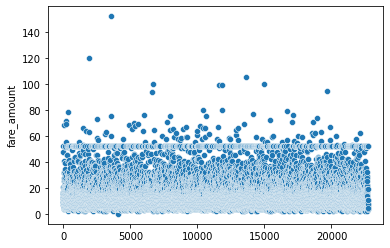

In [37]:
# Q. fare_amount의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['fare_amount'])

In [38]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.

def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [39]:
data['fare_amount'].apply(fare_func)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22472, dtype: float64

In [40]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [41]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
22525,Lisa Jacobs,04/26/2017 7:03:15 PM,04/26/2017 7:03:38 PM,Debit Card,2,0.08,2.50,1.29,0.00
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.50,0.00,0.00
13308,Chelsea Smith,05/16/2017 6:30:45 PM,05/16/2017 6:30:47 PM,Cash,1,8.40,2.50,0.00,0.00
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
14997,Thomas Williams,03/30/2017 12:20:30 PM,03/30/2017 12:34:15 PM,Credit Card,3,11.89,100.00,0.00,0.00
6710,Nicholas Charles,10/30/2017 11:23:46 AM,10/30/2017 11:23:49 AM,Credit Card,1,0.32,100.00,25.20,0.00
13623,Erica Byrd,11/04/2017 1:32:14 PM,11/04/2017 2:18:50 PM,Debit Card,2,19.80,105.00,8.00,2.64
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.00,12.50


<AxesSubplot:ylabel='tip_amount'>

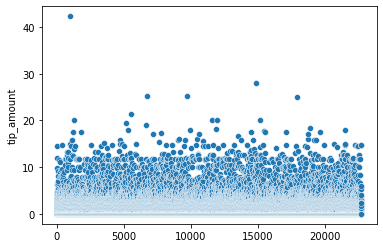

In [42]:
# Q. tip_amount의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['tip_amount'])

<AxesSubplot:xlabel='tip_amount', ylabel='Count'>

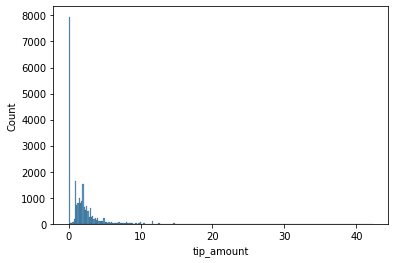

In [43]:
# Q. tip_amount의 이상치를 확인합니다.

sns.histplot(data['tip_amount'])

In [44]:
# Q. tip_amount의 이상치를 제거합니다.

data = data[data['tip_amount']<=40]

In [45]:
len(data)

22471

<AxesSubplot:ylabel='tolls_amount'>

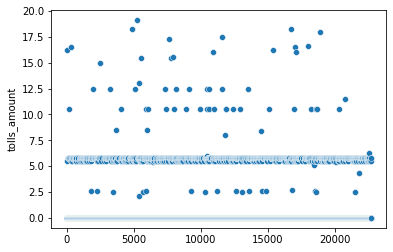

In [46]:
# Q. tolls_amount의 scatter plot을 그립니다.

sns.scatterplot(x=data.index, y=data['tolls_amount'])

In [47]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [48]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [49]:
data['payment_method'].nunique()

3

In [50]:
data['payment_method'].nunique()

3

In [51]:
data['payment_method'].value_counts()

Cash           11083
Debit Card      5721
Credit Card     5667
Name: payment_method, dtype: int64

In [52]:
# Q. 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다. 
# (힌트: replace() 메서드를 사용합니다.)

data['payment_method'] = data['payment_method'].replace(['Debit Card', 'Credit Card'], 'Card')
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00


In [53]:
data['payment_method'].value_counts()

Card    11388
Cash    11083
Name: payment_method, dtype: int64

In [54]:
example = 'Susan Robinson'

In [55]:
example.split()

['Susan', 'Robinson']

In [56]:
# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.

data['passenger_first_name'] = data['passenger_name'].str.split(' ').str[0]

In [57]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22471 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22471 non-null  object 
 1   tpep_pickup_datetime   22471 non-null  object 
 2   tpep_dropoff_datetime  22471 non-null  object 
 3   payment_method         22471 non-null  object 
 4   passenger_count        22471 non-null  int64  
 5   trip_distance          22471 non-null  float64
 6   fare_amount            22471 non-null  float64
 7   tip_amount             22471 non-null  float64
 8   tolls_amount           22471 non-null  float64
 9   passenger_first_name   22471 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [61]:
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [62]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22471 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22471 non-null  object        
 1   tpep_pickup_datetime   22471 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22471 non-null  datetime64[ns]
 3   payment_method         22471 non-null  object        
 4   passenger_count        22471 non-null  int64         
 5   trip_distance          22471 non-null  float64       
 6   fare_amount            22471 non-null  float64       
 7   tip_amount             22471 non-null  float64       
 8   tolls_amount           22471 non-null  float64       
 9   passenger_first_name   22471 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [64]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.

data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [65]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [68]:
# Q. travel_time 컬럼의 데이터를 초 단위로 변환합니다.

data['travel_time'] = data['travel_time'].dt.total_seconds()

In [69]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,travel_time_seconds
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844.0,844.0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590.0,1590.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432.0,432.0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,1815.0,1815.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003.0,1003.0


In [71]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,Pamela,844.0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,Michelle,1590.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,Tina,432.0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,Anthony,1815.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,Brianna,1003.0
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,Austin,196.0
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,Monique,2448.0
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,Drew,248.0
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,Jonathan,716.0


In [72]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.

data['total_amount'] = data['tip_amount'] + data['fare_amount'] + data['tolls_amount']

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

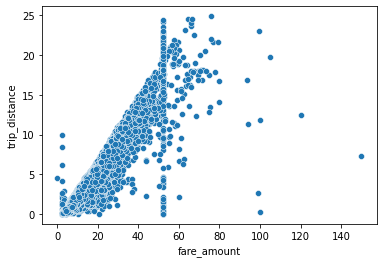

In [73]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.

sns.scatterplot(x = data['fare_amount'], y = data['trip_distance'])

<AxesSubplot:xlabel='fare_amount', ylabel='travel_time'>

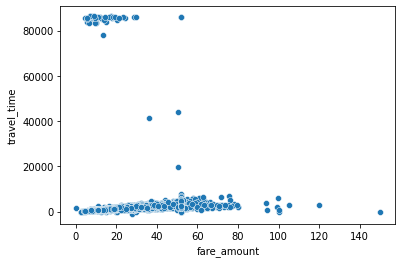

In [74]:
# Q. fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

sns.scatterplot(x = data['fare_amount'], y = data['travel_time'])

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time'>

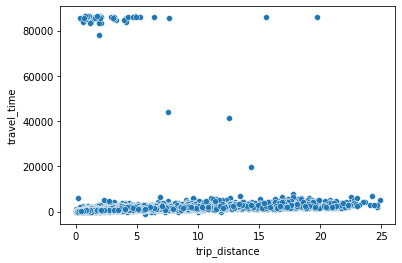

In [75]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.
sns.scatterplot(x = data['trip_distance'], y = data['travel_time'])

In [76]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거합니다.

data=data[data['travel_time']<60000]
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,Pamela,844.0,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,Michelle,1590.0,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,Tina,432.0,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,Anthony,1815.0,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,Brianna,1003.0,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,Austin,196.0,4.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,Monique,2448.0,72.40
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,Drew,248.0,4.50
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,Jonathan,716.0,12.20
